In [136]:
import os
import numpy as np
import pandas as pd
import pickle 
import my_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, precision_recall_curve, auc, confusion_matrix, classification_report
from mlxtend.plotting import  plot_confusion_matrix
import seaborn as sns

In [137]:
from sklearn.metrics import precision_recall_curve, make_scorer, auc

def au_prc(y_true, y_pred):
    prec, recall, tresholds = precision_recall_curve(y_true, y_pred)
    prc_score = auc(recall, prec)
    return prc_score

prc_score = make_scorer(au_prc, greater_is_better=True,  needs_proba= True)

In [138]:
numerical = ['hour', 'day_of_week', 'install_week', 'ad_blocker']
categorical = ['advertiser_id', 'platform', 'network', 'request_tld', 'creative_id', 'state', 'project_id', 'campaign_id', 'dma', 
               'location_id', 'keyword_id', 'url_category_ids', 'organization', 'browser_ver', 'country_code', 'content_category_ids']
convert_dict = {}
for att in categorical:
    convert_dict.update ({att: object})

In [139]:
items = os.listdir("Models/.")
print(items)

['GBM_campaign_768874.sav', 'GBM_campaign_821471.sav', 'GBM_creative_5188417.sav', 'LogisticRegression_campaign_768874.sav', 'LogisticRegression_campaign_821471.sav', 'LogisticRegression_creative_5188417.sav', 'RandomForest_campaign_768874.sav', 'RandomForest_campaign_821471.sav', 'RandomForest_creative_5188417.sav']


In [140]:
df_dict = {'df1':'campaign_821471.log',
           'df2':'campaign_768874.log',
           'df3':'creative_5188417.log'}

In [141]:
def confusion_matrix_plot(y_true, y_pred, labels):
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    annot = np.array(cm)
    nrows, ncols = cm.shape
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()

In [142]:
def results(data, y ,models, camp_id):
    
    result = pd.DataFrame(columns = ['DataSet', 'Model', 'score'])

    for mod in models:
        loaded_model = pickle.load(open( 'Models/' + mod, 'rb')) 
        pred = loaded_model.predict(data)
        pred_proba = loaded_model.predict_proba(data)
        pred_proba = pred_proba[:, 1]
        score = my_scorer.au_prc(y, pred_proba)
        result = result.append({'DataSet': camp_id, 'Model': mod, 'score': score},  ignore_index=True) 
    return result


In [143]:
def metrics(data, y ,models, camp_id):
    
    probas_dict = {}
    pred_dict = {}

    for mod in models:
        loaded_model = pickle.load(open( 'Models/' + mod, 'rb')) 
        pred = loaded_model.predict(data)
        pred_proba = loaded_model.predict_proba(data)
        pred_proba = pred_proba[:, 1]
        probas_dict.update({mod : pred_proba})
        pred_dict.update({mod : pred})
        
    return (pred_dict, probas_dict)

# Results on all data of campaign 821471

In [144]:
data_camp_821471 = pd.read_csv('campaign_821471.log', sep="\t",  dtype = convert_dict)
y = data_camp_821471['label']
X = data_camp_821471.loc[:, data_camp_821471.columns != 'label']

In [145]:
end = '821471'    
items = os.listdir("Models/.") 
models = []
for names in items:
    if names.endswith(end + '.sav'):
        models.append(names)

In [146]:
results(X, y ,models, '821471')

,DataSet,Model,score
0,821471,GBM_campaign_821471.sav,0.045086
1,821471,LogisticRegression_campaign_821471.sav,0.037163
2,821471,RandomForest_campaign_821471.sav,0.058229


In [147]:
pred, pred_probas = metrics(X, y , models, 'campid')

Confusion matrix for GBM_campaign_821471.sav


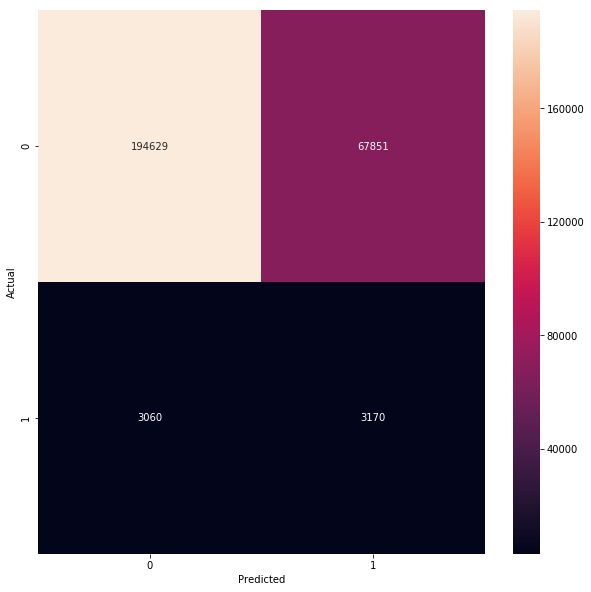

Confusion matrix for LogisticRegression_campaign_821471.sav


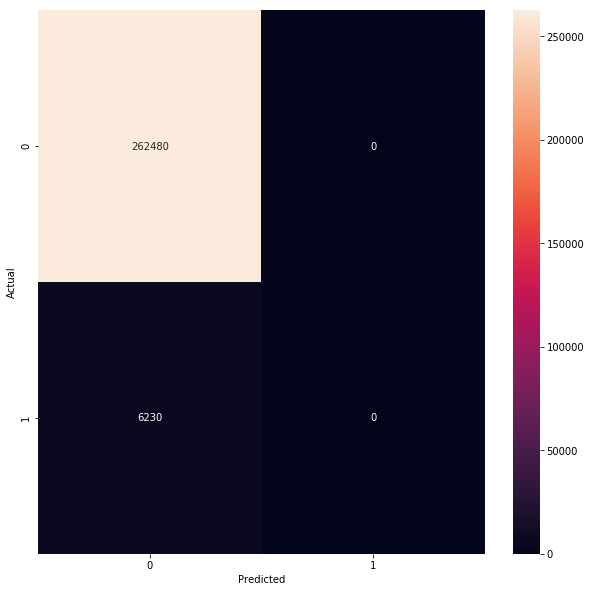

Confusion matrix for RandomForest_campaign_821471.sav


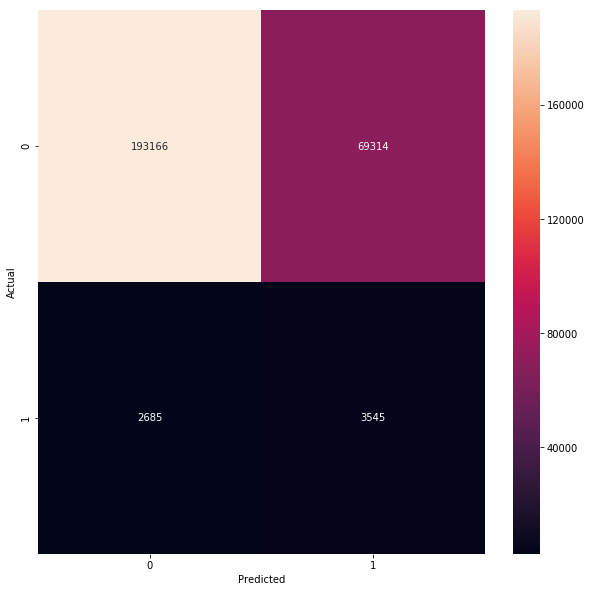

In [148]:
for key in pred.keys():
    y_pred = pred[key]
    print('Confusion matrix for ' + key)
    confusion_matrix_plot(y, y_pred, labels= np.array([0,1]))

Precision Recall curve for GBM_campaign_821471.sav


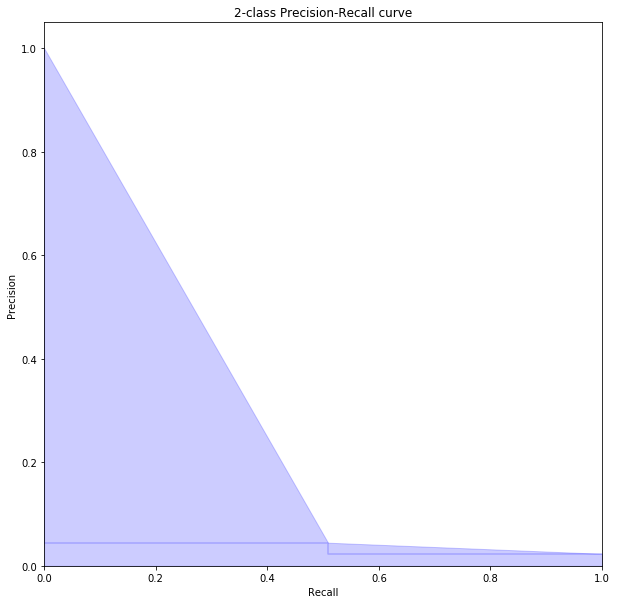

Precision Recall curve for LogisticRegression_campaign_821471.sav


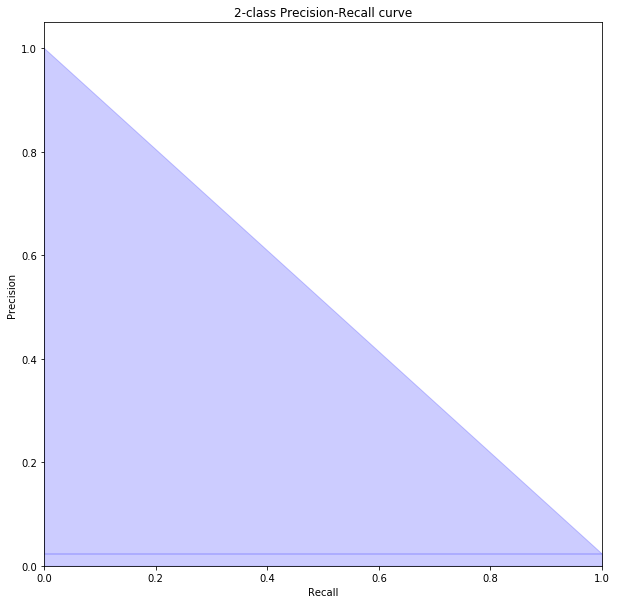

Precision Recall curve for RandomForest_campaign_821471.sav


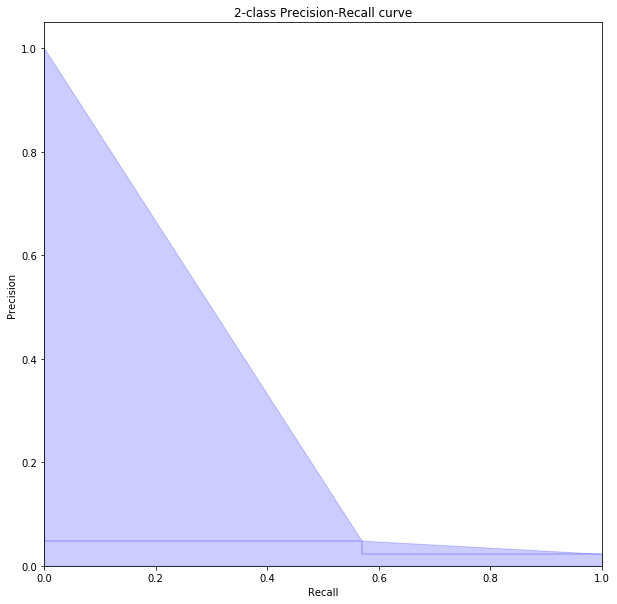

In [149]:
for key in pred.keys():
    y_pred = pred[key]
    print('Precision Recall curve for ' + key)
    precision, recall, thresholds = precision_recall_curve(y, y_pred)
    ######## Plot Precision-Recall curve 
    plt.close()
    fig, ax = plt.subplots(figsize=(10,10))
    plt.step(recall, precision, color='b', alpha=0.2,  where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve') #AP={0:0.2f}'.format(average_precision))
    plt.show()

# Results on all data of campaign 768874

In [169]:
campaign_768874 = pd.read_csv('campaign_768874.log', sep="\t",  dtype = convert_dict)
y = campaign_768874['label']
X = campaign_768874.loc[:, campaign_768874.columns != 'label']

In [170]:
end = '768874'    
items = os.listdir("Models/.") 
models = []
for names in items:
    if names.endswith(end + '.sav'):
        models.append(names)

In [171]:
results(X, y ,models, '768874')

,DataSet,Model,score
0,768874,GBM_campaign_768874.sav,0.018705
1,768874,LogisticRegression_campaign_768874.sav,0.003381
2,768874,RandomForest_campaign_768874.sav,0.020127


In [172]:
pred, pred_probas = metrics(X, y , models, 'campid')

Confusion matrix for GBM_campaign_768874.sav


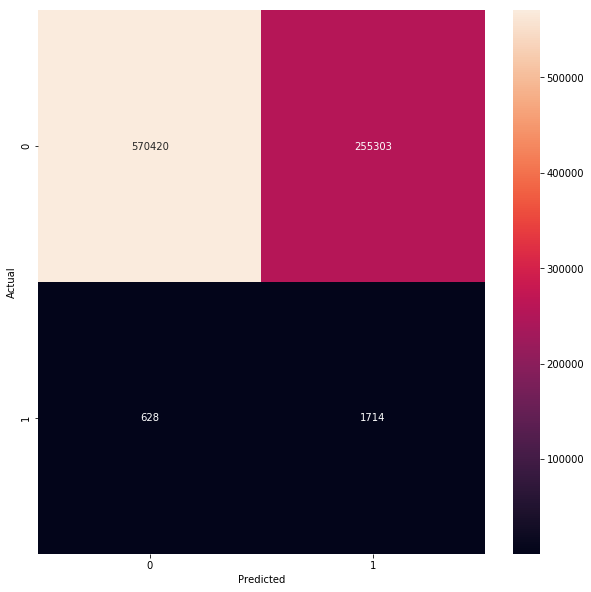

Confusion matrix for LogisticRegression_campaign_768874.sav


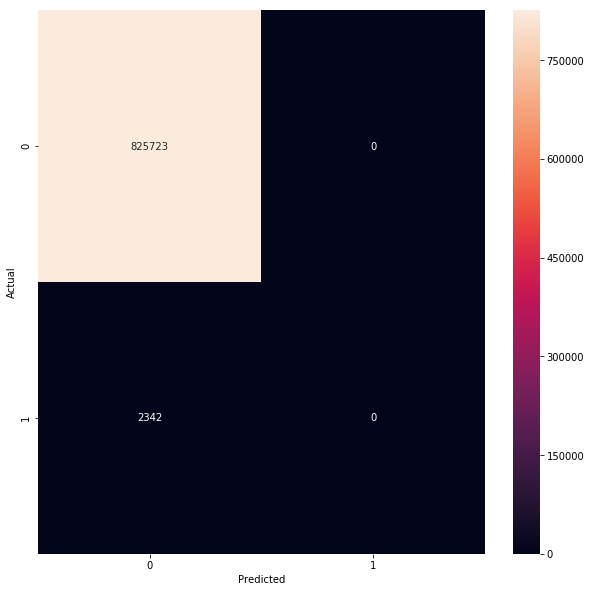

Confusion matrix for RandomForest_campaign_768874.sav


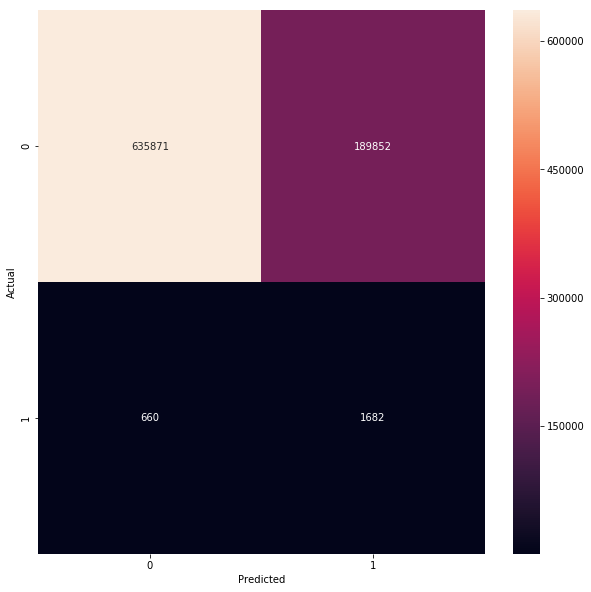

In [173]:
for key in pred.keys():
    y_pred = pred[key]
    print('Confusion matrix for ' + key)
    confusion_matrix_plot(y, y_pred, labels= np.array([0,1]))

Precision Recall curve for GBM_campaign_768874.sav


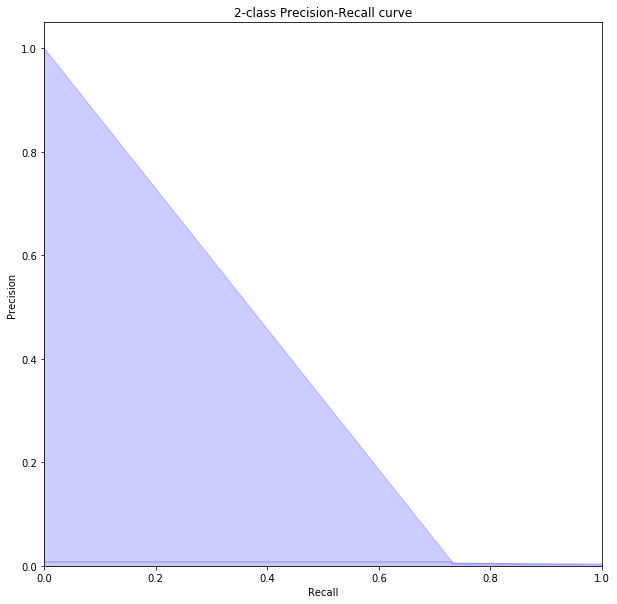

Precision Recall curve for LogisticRegression_campaign_768874.sav


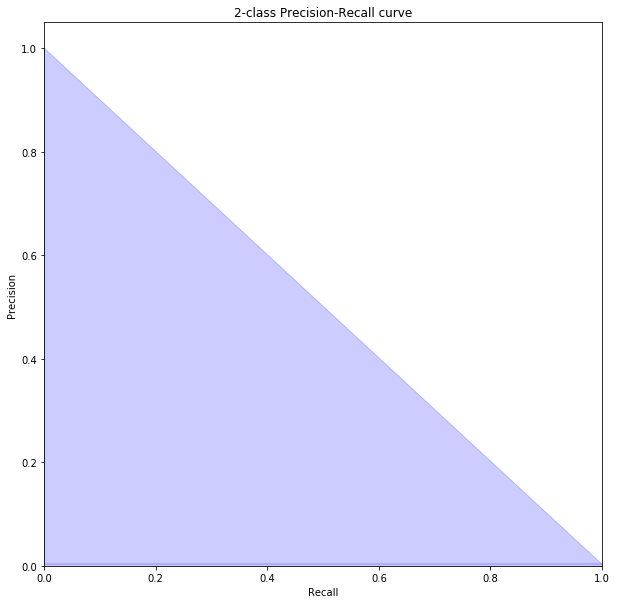

Precision Recall curve for RandomForest_campaign_768874.sav


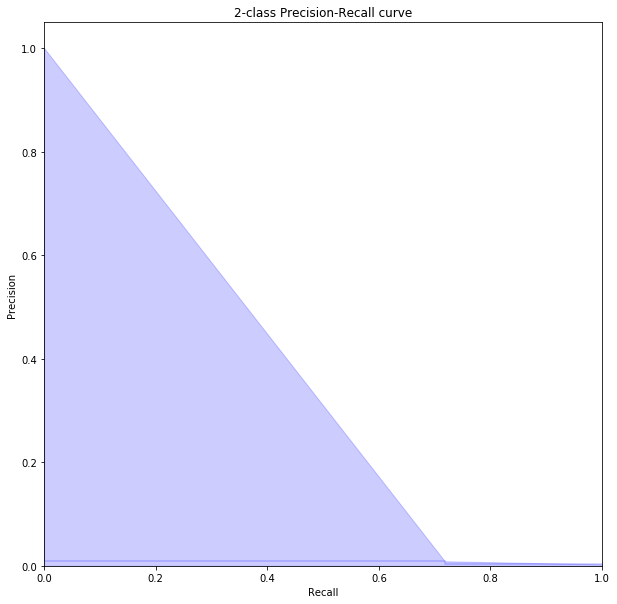

In [174]:
for key in pred.keys():
    y_pred = pred[key]
    print('Precision Recall curve for ' + key)
    precision, recall, thresholds = precision_recall_curve(y, y_pred)
    ######## Plot Precision-Recall curve 
    plt.close()
    fig, ax = plt.subplots(figsize=(10,10))
    plt.step(recall, precision, color='b', alpha=0.2,  where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve') #AP={0:0.2f}'.format(average_precision))
    plt.show()

# Results on all data of creative 5188417

In [163]:
data_crev_5188417 = pd.read_csv('creative_5188417.log', sep="\t",  dtype = convert_dict)
y = data_crev_5188417['label']
X = data_crev_5188417.loc[:, data_camp_821471.columns != 'label']

In [164]:
end = '5188417'    
items = os.listdir("Models/.") 
models = []
for names in items:
    if names.endswith(end + '.sav'):
        models.append(names)

In [165]:
results(X, y ,models, '5188417')

,DataSet,Model,score
0,5188417,GBM_creative_5188417.sav,0.085542
1,5188417,LogisticRegression_creative_5188417.sav,0.030890
2,5188417,RandomForest_creative_5188417.sav,0.065300


In [166]:
pred, pred_probas = metrics(X, y , models, 'campid')

Confusion matrix for GBM_creative_5188417.sav


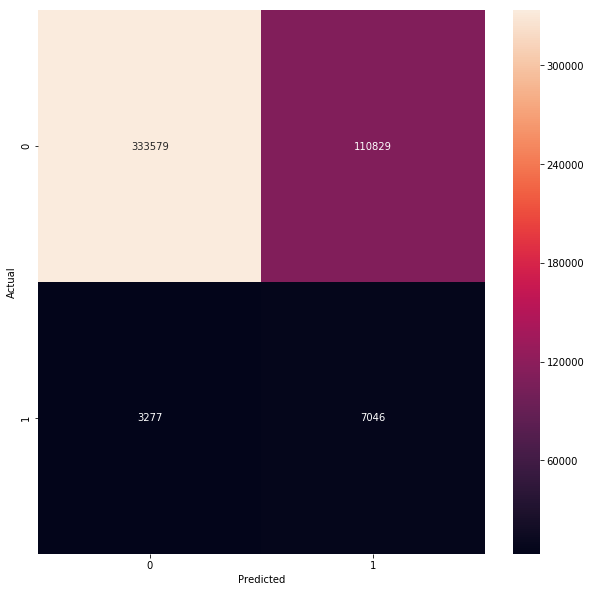

Confusion matrix for LogisticRegression_creative_5188417.sav


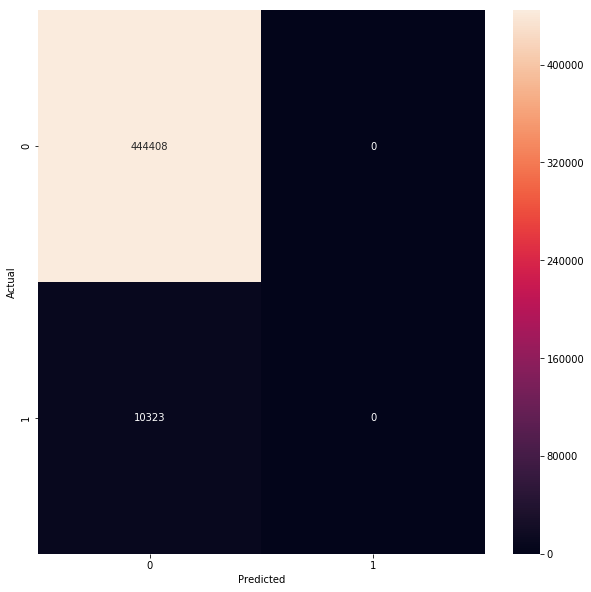

Confusion matrix for RandomForest_creative_5188417.sav


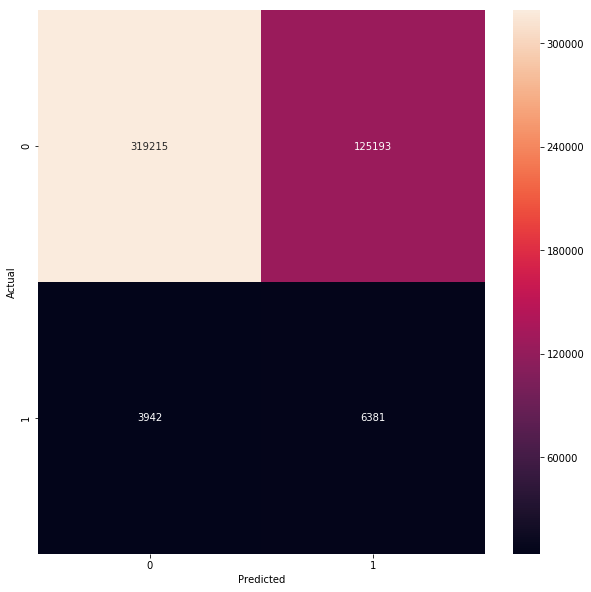

In [167]:
for key in pred.keys():
    y_pred = pred[key]
    print('Confusion matrix for ' + key)
    confusion_matrix_plot(y, y_pred, labels= np.array([0,1]))

Precision Recall curve for GBM_creative_5188417.sav


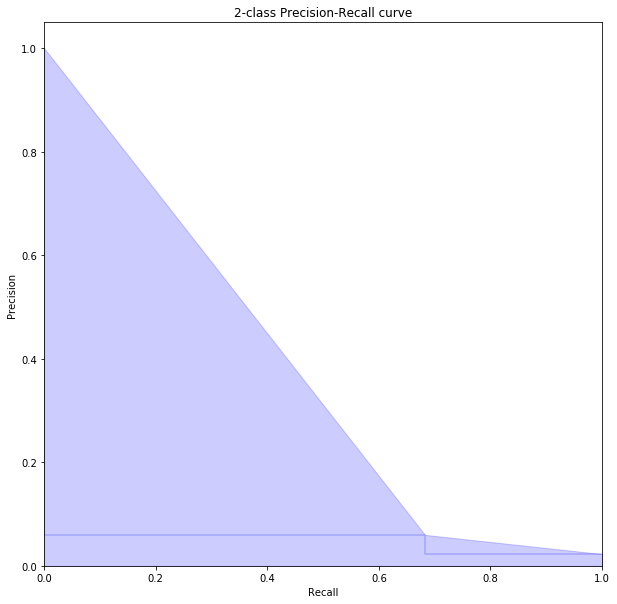

Precision Recall curve for LogisticRegression_creative_5188417.sav


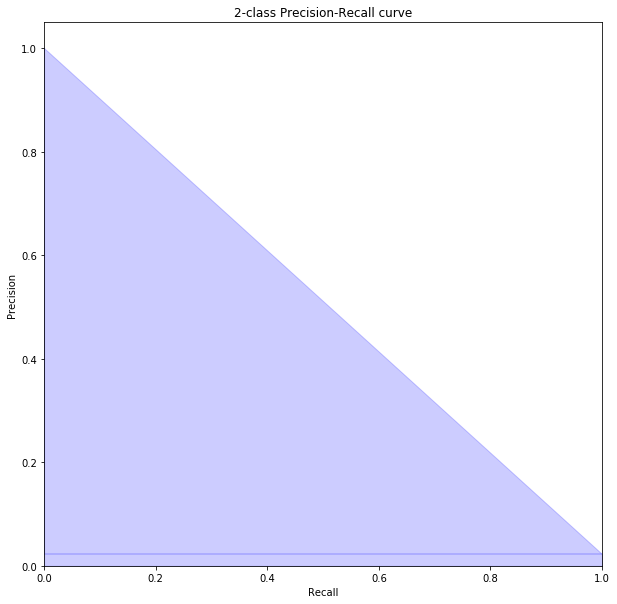

Precision Recall curve for RandomForest_creative_5188417.sav


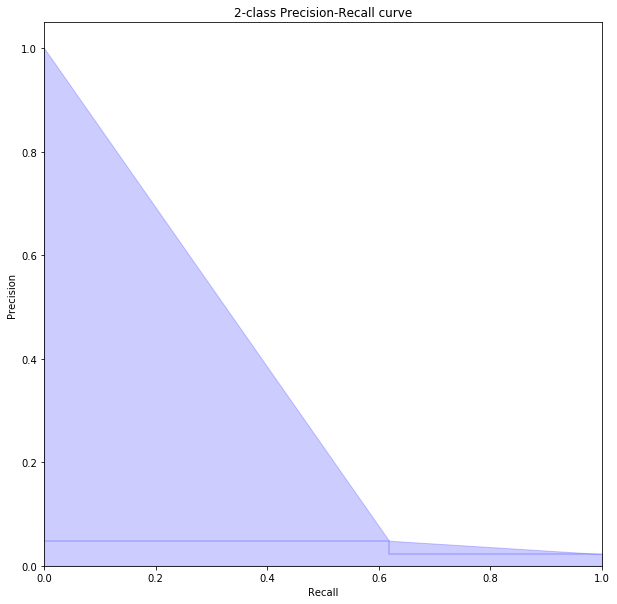

In [168]:
for key in pred.keys():
    y_pred = pred[key]
    print('Precision Recall curve for ' + key)
    precision, recall, thresholds = precision_recall_curve(y, y_pred)
    ######## Plot Precision-Recall curve 
    plt.close()
    fig, ax = plt.subplots(figsize=(10,10))
    plt.step(recall, precision, color='b', alpha=0.2,  where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve') #AP={0:0.2f}'.format(average_precision))
    plt.show()